# Sampling distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import pareto, uniform, norm, t, ttest_ind, ks_2samp, sem, bootstrap
%matplotlib inline

# PDF

In [2]:
pts = np.linspace(-3, 3, 100)
pts

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

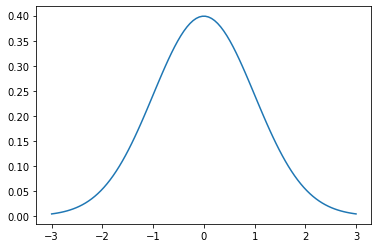

In [3]:
sns.lineplot(pts, norm().pdf(pts))

# CDF

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

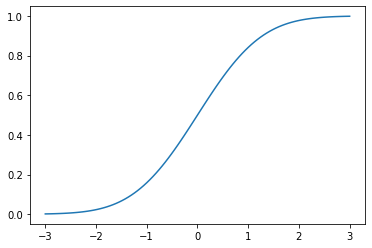

In [4]:
sns.lineplot(pts, norm().cdf(pts))

(4.989506887349853, 5.028664939542844)

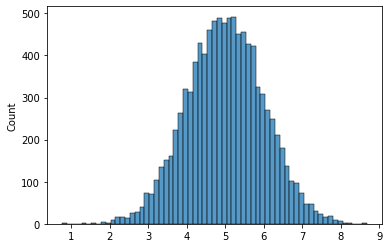

In [5]:
sample_pts = norm(5, 1).rvs(size=10000)
sample_error = sem(sample_pts)
confidence_interval = norm.interval(0.95, loc=sample_pts.mean(), scale=sample_error)
sns.histplot(sample_pts)
confidence_interval


In [6]:
z_table_lookup = norm.ppf((1 + .95) / 2)
z_table_lookup

1.959963984540054

In [7]:
sample_error = sem(sample_pts)
mean = sample_pts.mean()
(mean - z_table_lookup * sample_error, mean + z_table_lookup * sample_error)

(4.989506887349853, 5.028664939542844)

## Bootstrap sampling

In [8]:
bootstrap((sample_pts,), np.mean, confidence_level=0.95, n_resamples=100, method='percentile' )

BootstrapResult(confidence_interval=ConfidenceInterval(low=4.991781356542707, high=5.026700760221575), standard_error=0.009585988898877566)

### The hard way

In [9]:
import random
sample_pts_list = sample_pts.tolist()

n_bootstraps = 1000
# sample without replace
bootstrap_means = [np.mean(random.choices(sample_pts_list, k=len(sample_pts_list))) for _ in range(n_bootstraps)]
bootstrap_means = sorted(bootstrap_means)
bootstrap_means[int(0.025 * len(bootstrap_means))], bootstrap_means[int(0.975 * len(bootstrap_means))]

(4.989370630664379, 5.028349242136304)

# Sampling normal with uniform

In [10]:
uniform_pts = uniform(-3, 6).rvs(200)

In [11]:
uniform_pts

array([-2.13003971e+00,  2.33048994e+00, -2.26789783e+00,  1.97368197e+00,
        4.86442526e-01, -7.38880648e-01,  1.09578950e+00,  1.13072132e+00,
       -2.76345025e+00,  1.67826374e+00,  2.41651956e+00,  2.71913438e+00,
       -2.53337567e+00, -2.94424388e+00, -1.62998043e+00, -1.51947166e+00,
        8.80735727e-01, -1.70322187e+00,  7.46145678e-01,  2.51150912e+00,
        2.91782904e+00, -2.89176676e+00, -2.33148277e+00,  7.53237080e-01,
        8.16626017e-01,  1.24402812e+00, -2.25313975e+00, -2.01171294e+00,
       -5.45260359e-01,  1.05027663e+00, -2.79868790e+00, -2.53311319e+00,
       -1.35561533e+00,  1.62162271e+00, -1.93003748e+00,  7.12683124e-01,
        1.55748736e+00,  2.43267330e+00, -2.37441480e+00,  2.68331201e+00,
        1.43981953e+00,  2.53589645e+00,  2.27028566e+00, -2.73438643e+00,
       -3.66395211e-01,  6.21359862e-04,  1.94695306e+00,  1.37680009e+00,
       -6.69852977e-01,  5.34345382e-01, -1.48418511e+00,  2.14481250e+00,
       -7.00798186e-01,  

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

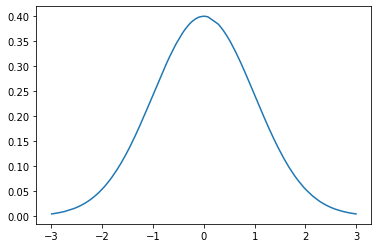

In [12]:
sns.lineplot(uniform_pts, norm().pdf(uniform_pts))

### Aside proving the Central Limit Theorem

In [13]:
sample_size = 1000
num_samples = 100
lots_of_uniform_samples = uniform(-40, 80).rvs((num_samples, sample_size))

In [14]:
lots_of_uniform_samples

array([[-35.18412248,   3.90300029, -35.19383498, ..., -25.08411276,
         39.33405088,  15.54692215],
       [ 37.00285096, -31.07814203,  11.46916761, ...,  -5.46534205,
         15.219316  , -23.04923189],
       [-25.41310154,  -6.75701728, -35.14420484, ...,   0.99955743,
         21.2972868 , -23.50669869],
       ...,
       [-36.04686035, -27.13942338,   5.76139914, ...,  -5.71421482,
          9.00887431, -25.3757475 ],
       [-23.95852021, -37.61708254,  28.10288288, ...,  23.59839534,
        -23.12915674, -19.40510173],
       [-21.10527368,  -4.79217017,  -2.84336502, ..., -11.06926222,
         37.8095255 ,   2.16694457]])

In [15]:
means_samples = lots_of_uniform_samples.mean(axis=0)
means_samples

array([-3.48725987e+00, -9.54090049e-01,  2.54721594e+00, -1.47770042e+00,
        4.75118081e+00, -2.14879403e+00, -5.60467013e+00,  4.95885924e+00,
       -1.95583581e+00,  9.90919180e-01,  1.19750508e+00,  4.01168520e+00,
       -6.76911120e-02, -1.35070173e+00, -2.01040162e+00,  1.43971363e+00,
       -3.26573065e+00,  6.28897010e-01,  2.05216605e+00, -3.30785496e+00,
       -3.02963692e-01, -3.35401278e+00,  1.45915859e+00,  6.27931582e+00,
        3.76935407e-01,  9.21444919e-01, -1.35759500e+00,  1.23771424e+00,
       -1.37973835e+00,  6.01796419e-01,  1.99971644e-01,  1.83061365e+00,
        8.19773132e-01, -6.27362370e-01, -9.93749408e-01,  4.02648214e+00,
        1.13276542e+00, -8.21991130e-01,  1.46114000e+00, -7.45083753e-01,
        2.60917899e+00,  2.16452025e+00, -1.71818749e+00,  5.85647498e-02,
        1.14343647e+00, -5.04842424e+00, -3.75956922e-01,  2.25447495e+00,
        1.96586747e+00,  2.68714169e+00,  3.72023197e-01, -8.79994762e-01,
       -2.01372698e-02, -

<AxesSubplot:title={'center':'Means of 100 sample(s)'}, ylabel='Count'>

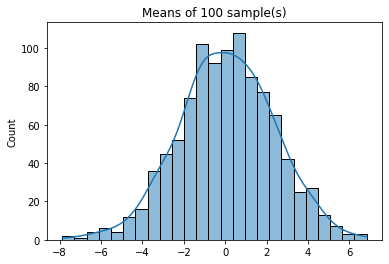

In [16]:
g = sns.histplot(means_samples, kde=True)
g.set_title(f'Means of {num_samples} sample(s)')
g

# Sampling Pareto distribution with normal

In [17]:
normal_pts = norm(2, 1).rvs(100)
normal_pts

array([ 0.9738624 ,  1.79728159,  0.97419384,  1.35249607,  2.26716695,
        4.19280085,  3.64535261,  3.02019328,  1.28824274,  3.31093602,
        2.54117805,  2.54374428,  0.18468264,  3.88415671,  3.04156412,
        2.56204461,  1.3222097 ,  0.95421205,  2.4653897 ,  3.84277594,
        3.63600651,  3.24494101, -0.63924274,  1.62355764,  2.21166071,
        2.93647709,  1.25885935,  1.72120815,  3.87454625,  2.68972202,
        0.588131  ,  3.0266552 ,  0.62380979,  0.79094809,  1.71873641,
        2.4074907 ,  1.43976738,  1.95804337,  1.80091597,  3.78113168,
        0.4441433 ,  2.48630063,  1.55643536,  0.84102351,  1.26190936,
        1.19154807,  0.63051899,  2.96349629,  2.93003435,  0.97752797,
        0.76567197,  0.68556991,  1.75166263,  1.20295743,  4.50767539,
        1.30136903,  2.55347729,  2.48439384,  1.47973997,  0.54596831,
        1.25053151,  2.85800726,  4.09680222,  2.70612778,  1.66678023,
        2.4137601 ,  1.3494351 ,  3.2363432 ,  1.90207522,  2.87

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

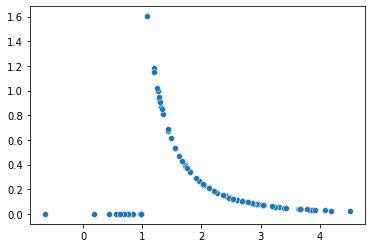

In [18]:
sns.scatterplot(normal_pts, pareto(2).pdf(normal_pts))

# Sampling 2 dimensions

In [19]:
angles = uniform(0, 2 * np.pi).rvs(1000)
angles

array([4.25374006e+00, 5.17310675e+00, 3.09725860e+00, 1.18611655e+00,
       6.69665370e-01, 4.31617672e+00, 2.18466259e+00, 4.19536673e+00,
       1.52569395e+00, 1.85883368e+00, 2.27264925e+00, 5.72239710e+00,
       5.41469173e+00, 5.69463347e+00, 2.44752202e+00, 6.15782199e+00,
       2.20013374e+00, 3.25654991e+00, 4.86243207e+00, 3.80877590e+00,
       9.36945720e-01, 3.73283046e+00, 2.04077034e+00, 1.74605606e+00,
       9.06570819e-02, 5.10605457e+00, 3.54495710e+00, 4.17305189e+00,
       5.18363755e+00, 5.30936775e+00, 4.69502949e+00, 3.83603561e+00,
       5.05420056e+00, 5.22239541e-01, 6.18467603e+00, 3.50192125e+00,
       4.47145268e+00, 2.30504649e+00, 3.16057926e+00, 3.67448064e+00,
       5.43953761e+00, 1.94318399e+00, 3.64992661e+00, 8.99011385e-01,
       3.63771346e+00, 3.70806093e+00, 1.34780178e+00, 4.11290466e+00,
       5.59415498e-01, 4.19012316e+00, 1.33409658e+00, 1.43505036e+00,
       2.03688945e+00, 1.12282349e+00, 3.61789610e+00, 1.11333584e+00,
      

In [20]:
radii = uniform().rvs(1000)
radii

array([0.15288612, 0.33434746, 0.91451751, 0.37693809, 0.98908193,
       0.43313769, 0.45498741, 0.49231354, 0.85336279, 0.83408016,
       0.26024993, 0.93356452, 0.88097545, 0.48915135, 0.93353658,
       0.82860829, 0.61582694, 0.51116473, 0.8812521 , 0.94986094,
       0.86759782, 0.74811758, 0.86007216, 0.89907933, 0.90796726,
       0.49128078, 0.79635466, 0.84130824, 0.28216896, 0.64459416,
       0.85351041, 0.79440333, 0.48548914, 0.98341879, 0.58921699,
       0.37268699, 0.43765295, 0.0082323 , 0.91081357, 0.95665633,
       0.22509618, 0.77736152, 0.8614605 , 0.68972436, 0.54647226,
       0.48457343, 0.09530429, 0.42370531, 0.3788285 , 0.43678578,
       0.49823214, 0.79863042, 0.75050775, 0.08234254, 0.60798828,
       0.27357689, 0.60237977, 0.32030503, 0.71404612, 0.41299134,
       0.34207215, 0.55232784, 0.95016185, 0.60664659, 0.12193265,
       0.24430302, 0.59801258, 0.66066604, 0.56938847, 0.55137756,
       0.06160216, 0.37202335, 0.32890957, 0.08324029, 0.73550

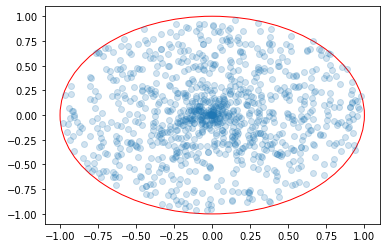

In [21]:
fig, ax = plt.subplots()
ax.plot(radii * np.cos(angles), radii * np.sin(angles), 'o', alpha=0.2)
ax.add_patch(plt.Circle((0, 0), 1, color='r', fill=False))

# Monte Carlo Sampling

In [22]:
samples = pd.DataFrame(uniform(-1, 2).rvs((1000, 2)), columns=['x', 'y'])
samples

,x,y
0,-0.814188,0.729860
1,-0.547946,-0.567555
2,0.805690,-0.652112
3,-0.042381,0.841985
4,0.826318,-0.209782
...,...,...
995,-0.385375,-0.115917
996,-0.054263,-0.967678
997,-0.936295,0.747905
998,-0.373501,0.249224


In [23]:
samples['within'] = samples.apply(lambda row: np.sqrt(row[0] ** 2 + row[1] ** 2) <= 1.0, axis=1)
samples

,x,y,within
0,-0.814188,0.729860,False
1,-0.547946,-0.567555,True
2,0.805690,-0.652112,False
3,-0.042381,0.841985,True
4,0.826318,-0.209782,True
...,...,...,...
995,-0.385375,-0.115917,True
996,-0.054263,-0.967678,True
997,-0.936295,0.747905,False
998,-0.373501,0.249224,True


In [24]:
within_samples = samples[samples['within']]
outside_samples = samples[~samples['within']]

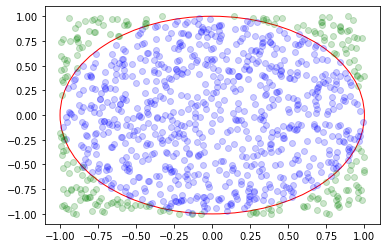

In [25]:
fig, ax = plt.subplots()
ax.plot(within_samples['x'], within_samples['y'], 'o', color='b', alpha=0.2)
ax.plot(outside_samples['x'], outside_samples['y'], 'o', color='g', alpha=0.2)
ax.add_patch(plt.Circle((0, 0), 1, color='r', fill=False))

# T-test

$$t = \frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{\sigma_{1}^{2}}{n_1} + \frac{\sigma_{2}^{2}}{n_2}}}$$

# Playing with values

t-value:  24.56265830389922
Alpha 5.517008259430968e-133
Accept alternative:  True


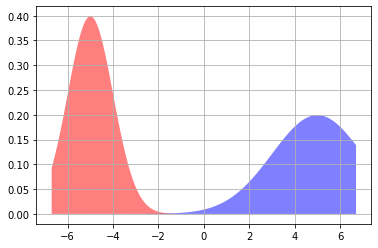

In [26]:
mean = 0
diff = 5
std_diff = 1
std = 1

x = np.linspace(norm.ppf(0.00000000001), norm.ppf(0.99999999999), 100000)

mu_1 = mean - diff
mu_2 = mean + diff

std_1 = std
std_2 = std + std_diff
y1 = norm.pdf(x, mu_1, std_1)
y2 = norm.pdf(x, mu_2, std_2)
plt.fill_between(x, y1, facecolor='red', interpolate= True, linewidth=0, alpha=0.5)
plt.fill_between(x, y2,facecolor='blue', interpolate= True, linewidth=0, alpha=0.5)


plt.grid()

t_value, alpha = ttest_ind(y1, y2, equal_var=False)
    
print("t-value: ", t_value)
print("Alpha", alpha)
print("Accept alternative: ", alpha <= 0.05)

KS stat 0.39
Alpha 3.5690338557186834e-07
Accept alternative:  True
KS Test max difference:  39


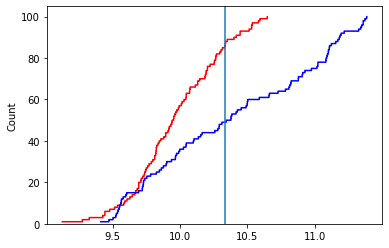

In [27]:
mu = 10
sigma = 0.3 
N = 100

np.random.seed(3)
s = np.random.normal(mu, sigma, N)
#np.random.seed(31)
#s2 = np.random.normal(mu, sigma, N)
s2 = np.random.uniform(9.41, 11.43, 100)

nbins = 10000
min_range = min([s.min(), s2.min()])
max_range = max([s.max(), s2.max()])

hist1, bin_edges1 = np.histogram(s, nbins, range=(min_range, max_range))
hist2, bin_edges2 = np.histogram(s2, nbins, range=(min_range, max_range))
cdf_hist1 = np.cumsum(hist1)
cdf_hist2 = np.cumsum(hist2)

diff = np.abs(cdf_hist1 - cdf_hist2)
max_diff = max(diff)
argmax_diff = np.argmax(diff)


g1 = sns.histplot(s, bins=nbins, cumulative=True, element='step', color='red', fill=False)
g2 = sns.histplot(s2, bins=nbins, cumulative=True, element='step', color='blue', fill=False)

g1.axes.axvline(bin_edges1[argmax_diff])
ks_stat, alpha = ks_2samp(s, s2)
print("KS stat", ks_stat)
print("Alpha", alpha)
print("Accept alternative: ", alpha <= 0.05)

print("KS Test max difference: ", max_diff)

# Permutation testing

In [28]:
s = s.tolist()
s2 = s2.tolist()

avg_s = np.mean(s)
avg_s2 = np.mean(s2)
combined = s + s2

n_permuations = int(1e4)
permutations = []
for i in range(n_permuations):
    new_combined = random.shuffle(combined)
    new_s_mean = np.mean(combined[:len(s)])
    new_s2_mean = np.mean(combined[len(s):])
    permutations.append(new_s_mean - new_s2_mean)

<AxesSubplot:ylabel='Count'>

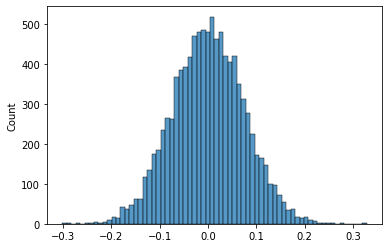

In [29]:
sns.histplot(permutations)

In [30]:
avg_s - avg_s2

-0.41649995470750945

In [31]:
permutations[:10]

[-0.08062084316096296,
 0.0740529006865156,
 0.01980890186329809,
 0.003475479301037865,
 0.0026079911104535114,
 0.04657699427379214,
 -0.02679025963083248,
 -0.14638318338549006,
 0.025203135799461762,
 0.11886226669212618]

In [32]:
gt_avg = len([i for i in permutations if i > avg_s - avg_s2])
gt_avg

10000

In [33]:
p_value = gt_avg / len(permutations)
p_value if p_value < 0.5 else 1 - p_value

0.0

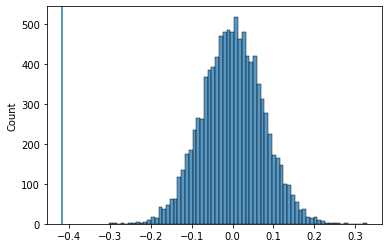

In [34]:
g = sns.histplot(permutations)
g.axes.axvline(avg_s - avg_s2)